In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

STEP 1:LOADING AND INSPECTING THE DATA

In [ ]:
df=pd.read_csv('dataset_task1.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe() #summary stats of the numeric columns

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print(df.info()) #missing values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.drop('customerID',axis=1,inplace=True) #dropping this because it isnt contributing anything to the analsyis as its a unique identifier

In [ ]:
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce') #coerce to convert the empty strings to NaN
#print(df['TotalCharges'].isnull().sum())
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"})
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [ ]:
#analysing the target variable
print(df['Churn'].value_counts(normalize=True))


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


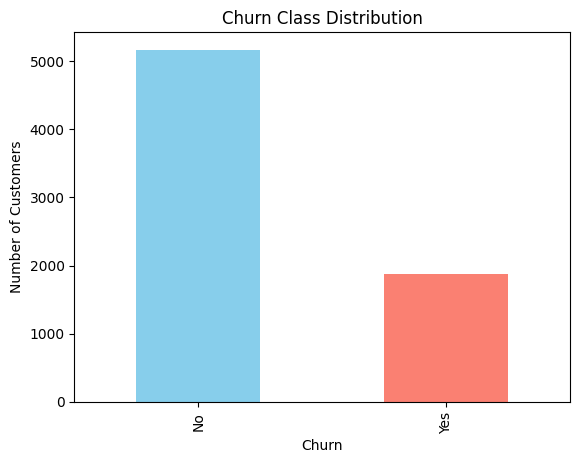

In [ ]:
# Analyze target variable  # proportions
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Churn Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#printing unique values in all the columns
for col in df.columns:
  print(col,df[col].unique())
  print(" "*50 )


gender ['Female' 'Male']
                                                  
SeniorCitizen [0 1]
                                                  
Partner ['Yes' 'No']
                                                  
Dependents ['No' 'Yes']
                                                  
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
                                                  
PhoneService ['No' 'Yes']
                                                  
MultipleLines ['No phone service' 'No' 'Yes']
                                                  
InternetService ['DSL' 'Fiber optic' 'No']
                                                  
OnlineSecurity ['No' 'Yes' 'No internet service']
                                                  
OnlineBackup ['Yes' 'No' 'No internet service']
       

INSIGHTS
1.   THE CUSTOMER ID WAS REMOVED AS IT DOESNT CONTRIBUTE TO MODELLING
2.   NO MISSING VALUES IN THE DATASET

1.   TARGET COLUMN WAS IDENTIFIED AND CLASS IMBALANCE WAS SEEN
2.   Total charges were converted from object to float and the empty strings were filled with 0





/tmp/ipython-input-1555259194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=df,palette=['purple','salmon'])


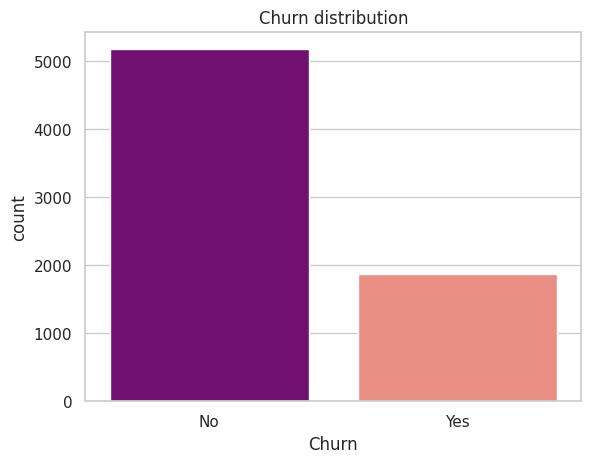

In [ ]:
#EDA STARTS
sns.set(style="whitegrid")
sns.countplot(x='Churn',data=df,palette=['purple','salmon'])
plt.title('Churn distribution')
plt.show()
#this shows class imbalance

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


numerical feature analysis

*   histplot
*   boxplot
*   heatmap







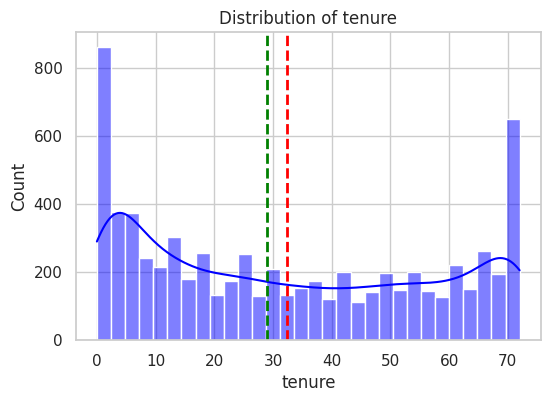

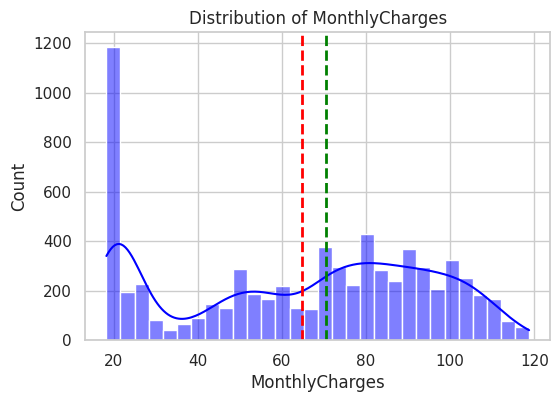

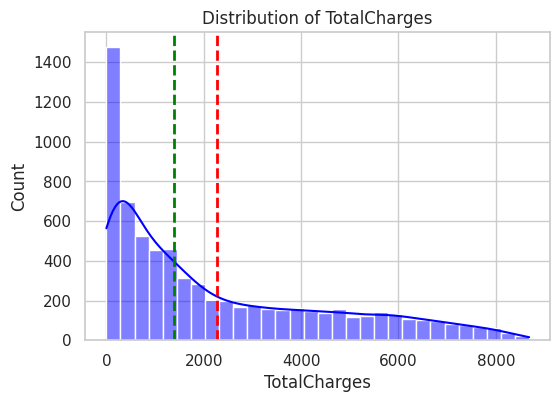

In [ ]:
#numerical features analysis
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    col_mean=df[col].mean()
    col_median=df[col].median()
    #to plot mean and median lines
    plt.axvline(col_mean,color="red",linestyle='dashed',linewidth=2)
    plt.axvline(col_median,color="green",linestyle='dashed',linewidth=2)
    plt.show()



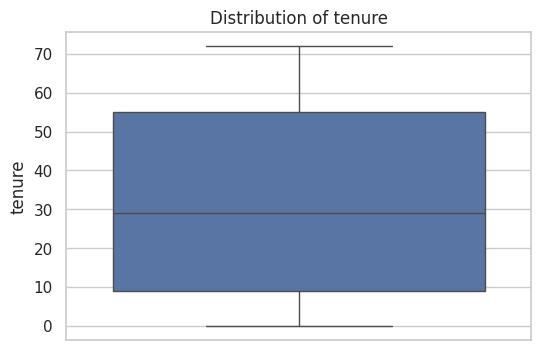

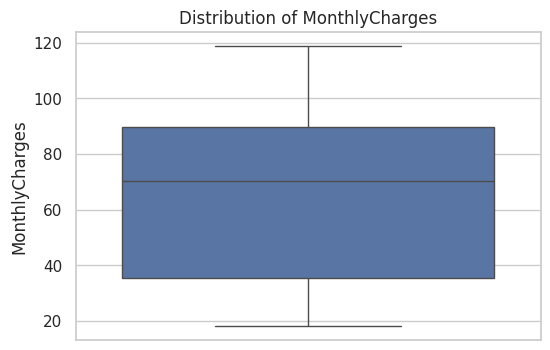

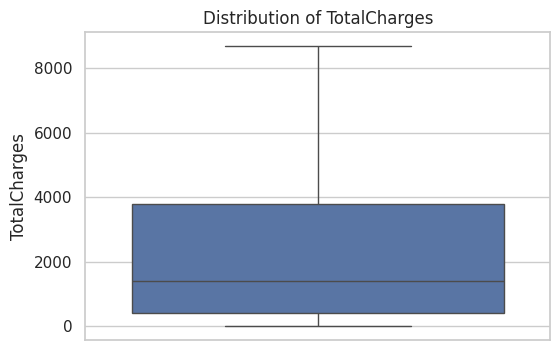

In [ ]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    col_mean=df[col].mean()
    col_median=df[col].median()
    #to plot mean and median lines
    #plt.axvline(col_mean,color="red",linestyle='dashed',linewidth=2)
    #plt.axvline(col_median,color="green",linestyle='dashed',linewidth=2)
    plt.show()

correlation heatmap for mumercial columns

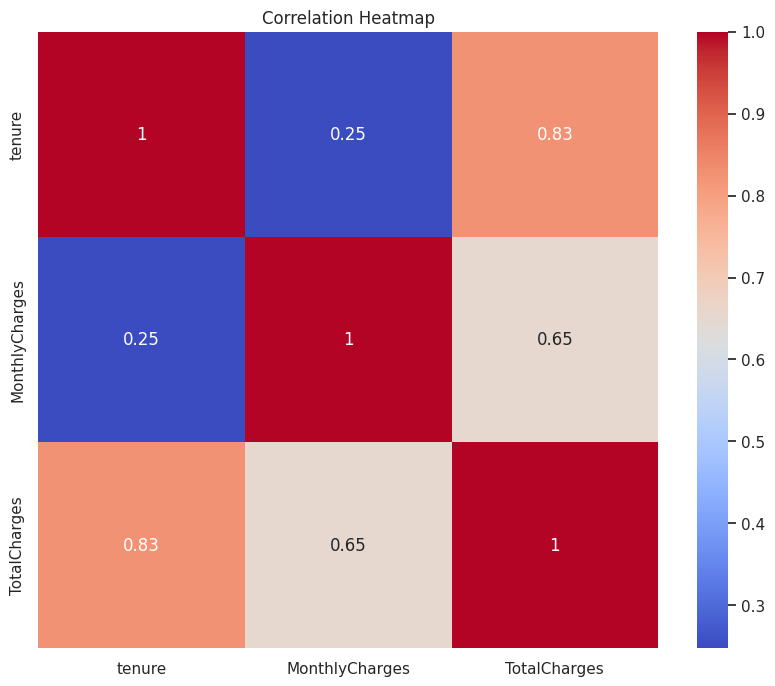

In [ ]:
#correlation heatmap
numeric_cols=["tenure","MonthlyCharges","TotalCharges"]
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
#high correlation beetween tenure and monthly charges may cause multicollinearity

#analysis of categorical features

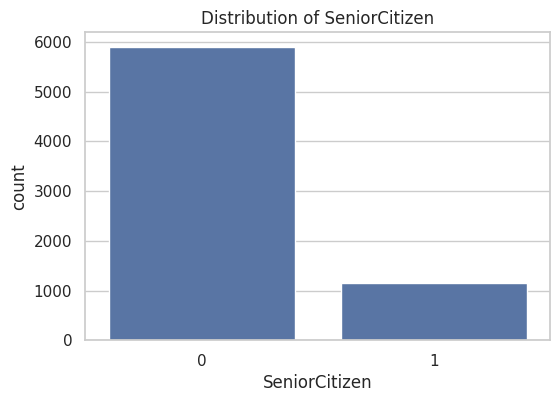

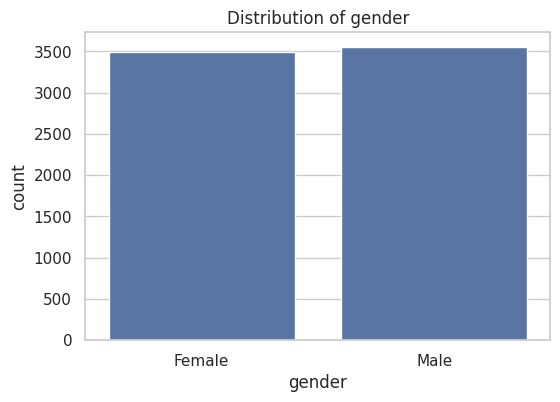

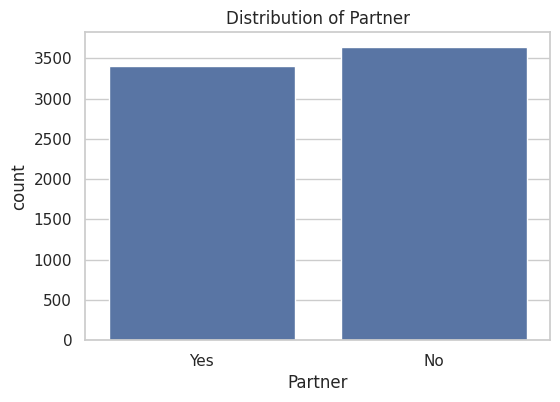

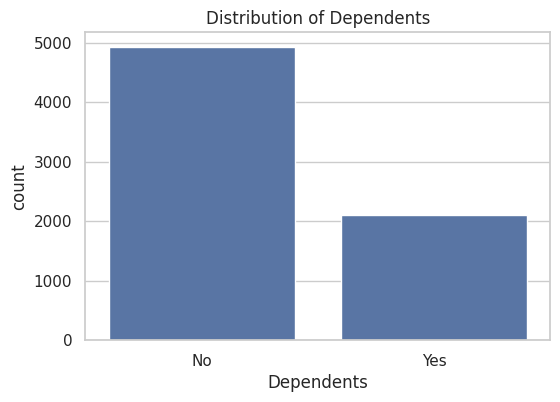

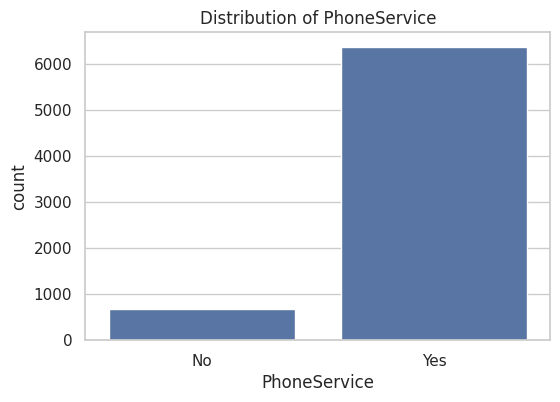

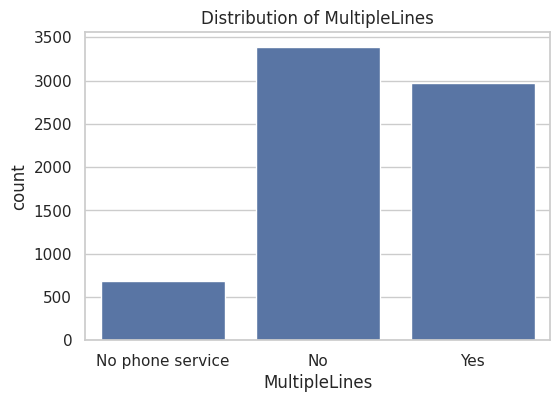

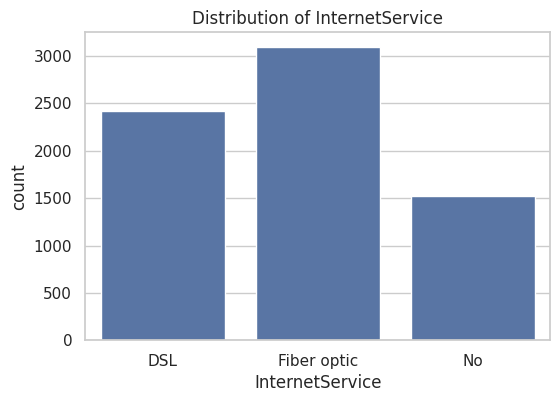

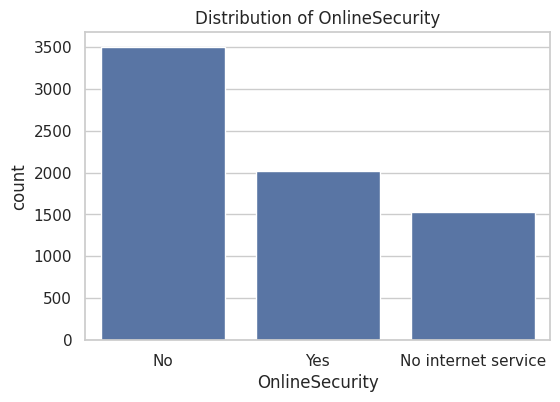

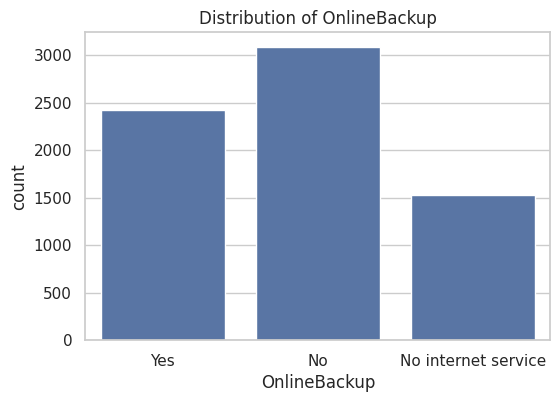

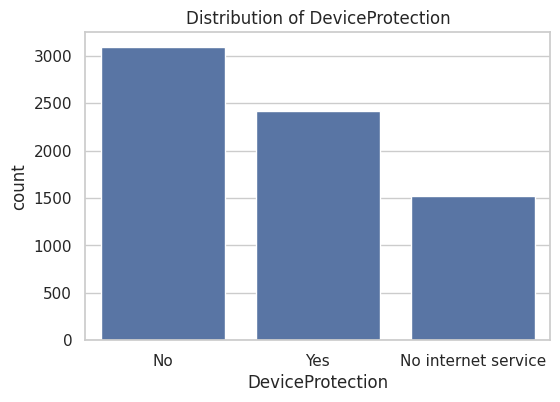

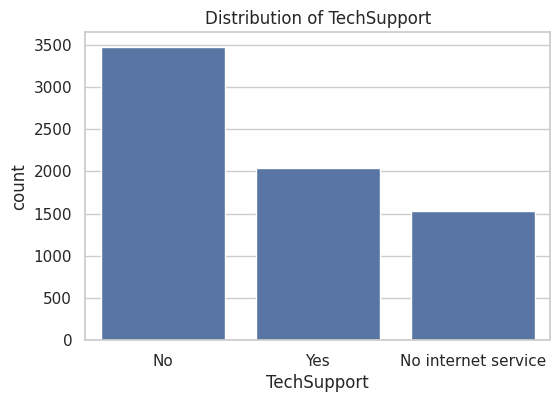

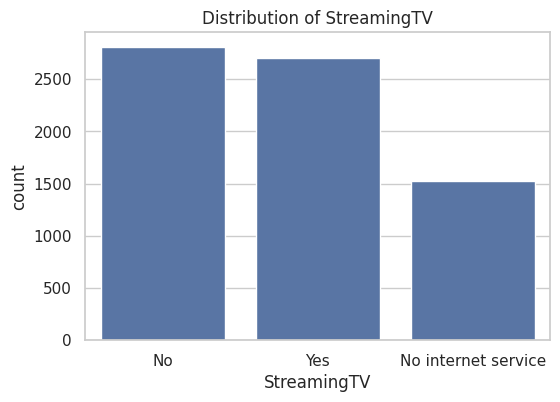

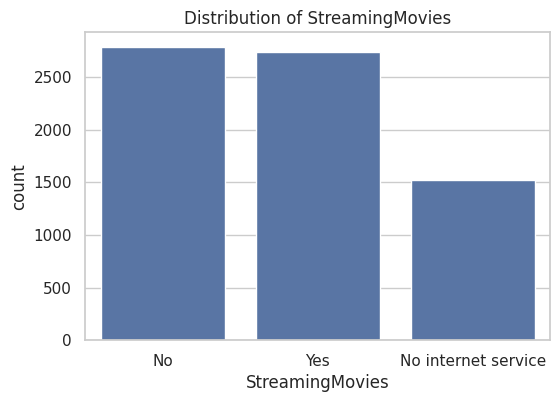

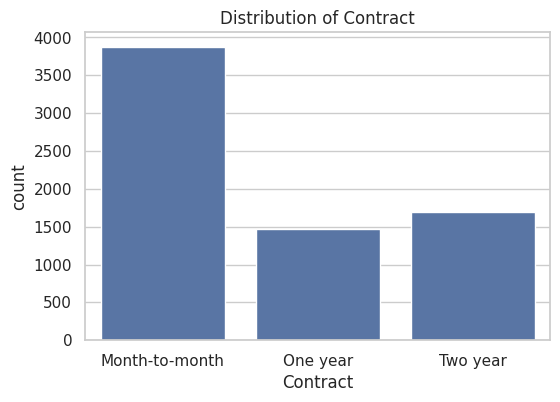

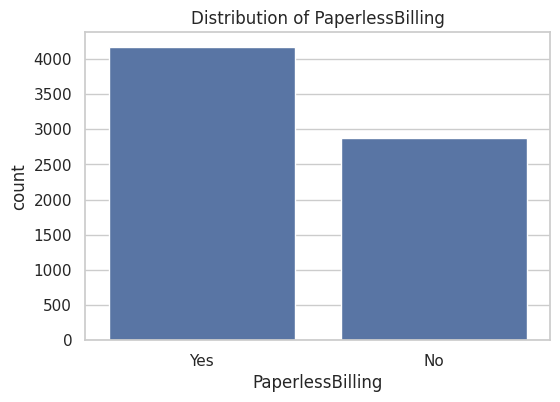

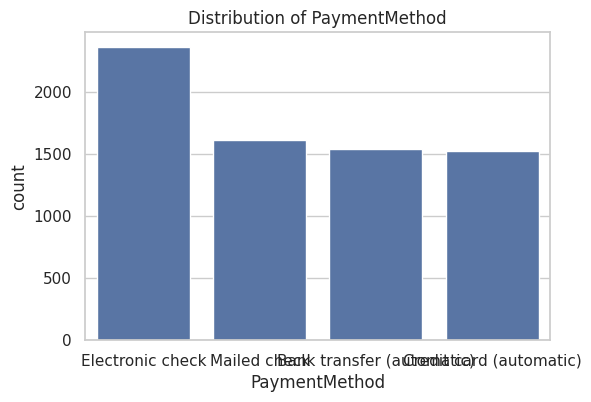

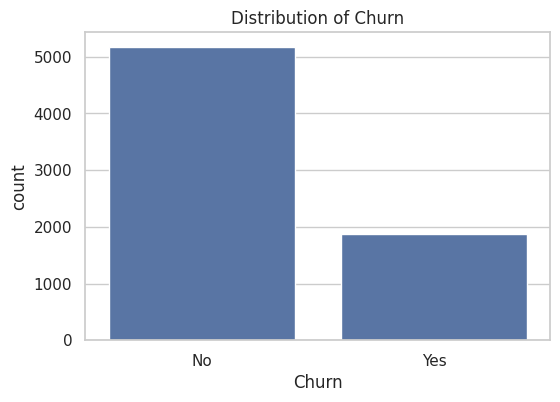

In [ ]:
#countplot
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols=["SeniorCitizen"]+ object_cols
for col in object_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(x=df[col])
  plt.title(f"Distribution of {col}")
  plt.show()

# Data Preprocesing

In [ ]:
#label encoding of target column
#because for models 0 and 1 is easy to understand than yes or no (strings)
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [ ]:
df.head()
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
"""categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

encoders = {}
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

print(encoders)  # should now show all columns"""



"categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',\n                    'MultipleLines', 'InternetService', 'OnlineSecurity',\n                    'OnlineBackup', 'DeviceProtection', 'TechSupport',\n                    'StreamingTV', 'StreamingMovies', 'Contract',\n                    'PaperlessBilling', 'PaymentMethod']\n\nencoders = {}\nfrom sklearn.preprocessing import LabelEncoder\n\nfor col in categorical_cols:\n    le = LabelEncoder()\n    df[col] = le.fit_transform(df[col])\n    encoders[col] = le\n\nprint(encoders)  # should now show all columns"

In [ ]:
print(df['gender'].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64


In [ ]:
print(df['Dependents'].value_counts())

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


In [ ]:
#now handle imbalance using smote
#before that perform splitting into training and test set
X=df.drop('Churn',axis=1)
y=df['Churn']
#not using standardscaler as im gonna used tree based model




In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42 ,stratify=y)#stratify=y ensures that the proportion of classes in your target variable y is preserved in both train and test sets.

In [ ]:
print(y_train.value_counts())

Churn
No     4139
Yes    1495
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# 1. Define which columns are numeric and which are categorical
#    Replace these with your actual column names
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

#  Create the preprocessor using ColumnTransformer
#   For numeric columns  we  are gonna apply StandardScaler.
#   For categorical columns  we  are gonna apply OneHotEncoder.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keeps any columns not listed (optional)
)

# 3. Create the final pipeline using the imblearn Pipeline
#    This pipeline correctly sequences the steps:
#    1. The data is preprocessed (scaled/encoded).
#    2. SMOTE is applied ONLY to the training data.
#    3. The XGBoost model is trained on the balanced data.
final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# 4. Train the entire pipeline on your training data
print("Training the full pipeline with preprocessing and SMOTE...")
final_pipeline.fit(X_train, y_train)
print("Training complete!")
# Define the parameter grid for the classifier step of the pipeline
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1]
}

# Set up and run the Grid Search
grid_search = GridSearchCV(estimator=final_pipeline, param_grid=param_grid, scoring='recall', cv=3, n_jobs=-1)

print("Starting the final Grid Search...")
grid_search.fit(X_train, y_train)
print("Search complete!")
print(f"Best parameters found: {grid_search.best_params_}")

# You can now use this 'final_pipeline' object to make predictions
# y_pred = final_pipeline.predict(X_test)

Training the full pipeline with preprocessing and SMOTE...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:49:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete!
Starting the final Grid Search...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:50:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Search complete!
Best parameters found: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


In [ ]:
#use smote now (synthetic minority oversampling technique)

In [ ]:
#smote=SMOTE(random_state=42)
#X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [ ]:
#print(y_train_resampled.value_counts())

In [ ]:
from sklearn.metrics import classification_report

# Gets the best model (the entire pipeline) from your completed grid search
best_model = grid_search.best_estimator_

# Use this best model to make predictions on the test set
y_pred_final = best_model.predict(X_test)


# Print the final classification report
print("Final Performance on Unseen Test Data")
print(classification_report(y_test, y_pred_final))

Final Performance on Unseen Test Data
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
models_to_test = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}
for name, model in models_to_test.items():
    print(f"Training {name} ")

    # Create a pipeline for each model
    # This ensures scaling and SMOTE are applied correctly for each one
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = pipeline.predict(X_test)

    print(f"{name} Performance Report")
    print(classification_report(y_test, y_pred))

Training LDA 
LDA Performance Report
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409

Training QDA 
QDA Performance Report
              precision    recall  f1-score   support

           0       0.89      0.44      0.59      1035
           1       0.35      0.86      0.50       374

    accuracy                           0.55      1409
   macro avg       0.62      0.65      0.54      1409
weighted avg       0.75      0.55      0.56      1409



/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
# 1. Define the Pipelines and Parameter Grids for each model

# Pipeline for Random Forest (Bagging)
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5]
}

# Pipeline for AdaBoost (Boosting)
pipeline_ada = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', AdaBoostClassifier(random_state=42))
])
param_grid_ada = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0]
}

# Pipeline for XGBoost (Boosting) from your code
pipeline_xgb = final_pipeline # Reusing your existing pipeline
param_grid_xgb = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1]
}


#2. Create a list of pipelines and grids to search over
searches = [
    ('Random Forest', pipeline_rf, param_grid_rf),
    ('AdaBoost', pipeline_ada, param_grid_ada),
    ('XGBoost', pipeline_xgb, param_grid_xgb)
]

# 3. Loop through, run GridSearchCV for each, and store results ---
best_estimators = {}
for name, pipeline, param_grid in searches:
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='recall', cv=3, n_jobs=-1)

    print(f"--- Starting Grid Search for {name} ---")
    grid_search.fit(X_train, y_train)
    print(f"--- Search complete for {name} ---")
    print(f"Best Score (Recall): {grid_search.best_score_:.4f}")
    print(f"Best Params: {grid_search.best_params_}\n")

    best_estimators[name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_
    }

# 4. Summarize and find the overall best model
results_df = pd.DataFrame.from_dict(best_estimators, orient='index')
best_overall_model_name = results_df['best_score'].idxmax()
best_overall_model = best_estimators[best_overall_model_name]

print(" Overall Tuning Summary")
print(results_df[['best_score', 'best_params']])
print(f"\n🏆 The best overall model is: {best_overall_model_name} with a recall of {best_overall_model['best_score']:.4f}")

--- Starting Grid Search for Random Forest ---
--- Search complete for Random Forest ---
Best Score (Recall): 0.7599
Best Params: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

--- Starting Grid Search for AdaBoost ---
--- Search complete for AdaBoost ---
Best Score (Recall): 0.8870
Best Params: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}

--- Starting Grid Search for XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:52:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Search complete for XGBoost ---
Best Score (Recall): 0.8033
Best Params: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}

 Overall Tuning Summary
               best_score                                        best_params
Random Forest    0.759887  {'classifier__max_depth': 5, 'classifier__min_...
AdaBoost         0.886967  {'classifier__learning_rate': 0.01, 'classifie...
XGBoost          0.803342  {'classifier__learning_rate': 0.01, 'classifie...

🏆 The best overall model is: AdaBoost with a recall of 0.8870


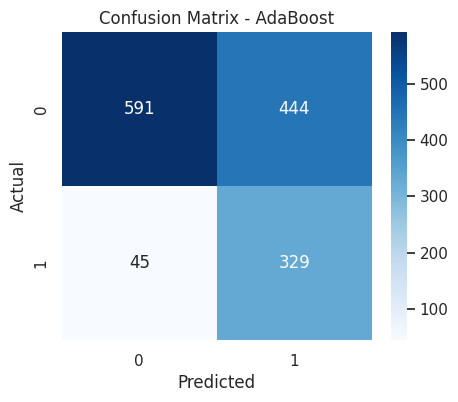


📊 Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0     0.9292    0.5710    0.7074      1035
           1     0.4256    0.8797    0.5737       374

    accuracy                         0.6529      1409
   macro avg     0.6774    0.7253    0.6405      1409
weighted avg     0.7956    0.6529    0.6719      1409

ROC-AUC Score: 0.7748


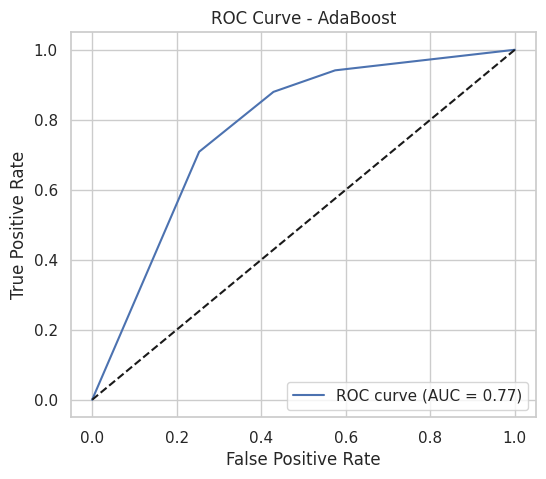

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pick the best overall model from your search
final_model_name = best_overall_model_name
final_model = best_estimators[final_model_name]["best_estimator"]

# 2. Predictions on the test set
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {final_model_name}")
plt.show()

# 4. Classification Report (Precision, Recall, F1-score)
print(f" Classification Report for {final_model_name}:")
print(classification_report(y_test, y_pred, digits=4))

# 5. ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 6. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {final_model_name}")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib

# Your best model is stored in the grid_search object from the tuning step
final_model = grid_search.best_estimator_

# Save the entire pipeline to a file
joblib.dump(final_model, 'churn_model.pkl')

print("Final model saved as 'churn_model.pkl'")

Final model saved as 'churn_model.pkl'
